In [1]:
# %pip install mysql-connector-python

In [2]:
import mysql.connector
from mysql.connector import connect, Error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (16, 8)
sns.set_style('darkgrid')

In [3]:
employees = mysql.connector.connect(
    host="localhost",
    user="root",
    passwd=input("please, enter you password: "),
    database="employees"
)

cursor = employees.cursor()

In [4]:
df = pd.read_sql_query(
    '''
    SELECT e.birth_date, e.first_name, e.last_name, e.gender,
    t.title, t.from_date,
    s.salary
    FROM employees e
    INNER JOIN 
    titles t 
    ON e.emp_no = t.emp_no
    INNER JOIN
    salaries s
    ON t.emp_no = s.emp_no
    GROUP BY e.emp_no ORDER BY e.emp_no;
    ''', 
    employees, parse_dates=["from_date", "birth_date"]
    )


In [5]:
print(df.head(10))

  birth_date first_name  last_name gender               title  from_date  \
0 1953-09-02     Georgi    Facello      M     Senior Engineer 1986-06-26   
1 1964-06-02    Bezalel     Simmel      F               Staff 1996-08-03   
2 1959-12-03      Parto    Bamford      M     Senior Engineer 1995-12-03   
3 1954-05-01  Chirstian    Koblick      M            Engineer 1986-12-01   
4 1955-01-21    Kyoichi   Maliniak      M        Senior Staff 1996-09-12   
5 1953-04-20     Anneke    Preusig      F     Senior Engineer 1990-08-05   
6 1957-05-23    Tzvetan  Zielinski      F        Senior Staff 1996-02-11   
7 1958-02-19     Saniya   Kalloufi      M  Assistant Engineer 1998-03-11   
8 1952-04-19     Sumant       Peac      F  Assistant Engineer 1985-02-18   
9 1963-06-01  Duangkaew   Piveteau      F            Engineer 1996-11-24   

   salary  
0   60117  
1   65828  
2   40006  
3   40054  
4   78228  
5   40000  
6   56724  
7   46671  
8   60929  
9   72488  


In [6]:
column_names = ['title', 'first_name', 'last_name', 'birth_date', 'gender', 'salary', 'from_date']
df = df.reindex(columns=column_names)

In [7]:
print(df.head(10))

                title first_name  last_name birth_date gender  salary  \
0     Senior Engineer     Georgi    Facello 1953-09-02      M   60117   
1               Staff    Bezalel     Simmel 1964-06-02      F   65828   
2     Senior Engineer      Parto    Bamford 1959-12-03      M   40006   
3            Engineer  Chirstian    Koblick 1954-05-01      M   40054   
4        Senior Staff    Kyoichi   Maliniak 1955-01-21      M   78228   
5     Senior Engineer     Anneke    Preusig 1953-04-20      F   40000   
6        Senior Staff    Tzvetan  Zielinski 1957-05-23      F   56724   
7  Assistant Engineer     Saniya   Kalloufi 1958-02-19      M   46671   
8  Assistant Engineer     Sumant       Peac 1952-04-19      F   60929   
9            Engineer  Duangkaew   Piveteau 1963-06-01      F   72488   

   from_date  
0 1986-06-26  
1 1996-08-03  
2 1995-12-03  
3 1986-12-01  
4 1996-09-12  
5 1990-08-05  
6 1996-02-11  
7 1998-03-11  
8 1985-02-18  
9 1996-11-24  


In [8]:
df.shape

(300024, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   title       300024 non-null  object        
 1   first_name  300024 non-null  object        
 2   last_name   300024 non-null  object        
 3   birth_date  300024 non-null  datetime64[ns]
 4   gender      300024 non-null  object        
 5   salary      300024 non-null  int64         
 6   from_date   300024 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 16.0+ MB


In [10]:
df.isna().sum()

title         0
first_name    0
last_name     0
birth_date    0
gender        0
salary        0
from_date     0
dtype: int64

In [11]:
df.columns

Index(['title', 'first_name', 'last_name', 'birth_date', 'gender', 'salary',
       'from_date'],
      dtype='object')

In [12]:
df.describe()

,salary
count,300024.000000
mean,52970.732451
std,14301.478491
min,40000.000000
25%,40000.000000
50%,48681.000000
75%,61758.000000
max,129492.000000


<AxesSubplot:ylabel='Frequency'>

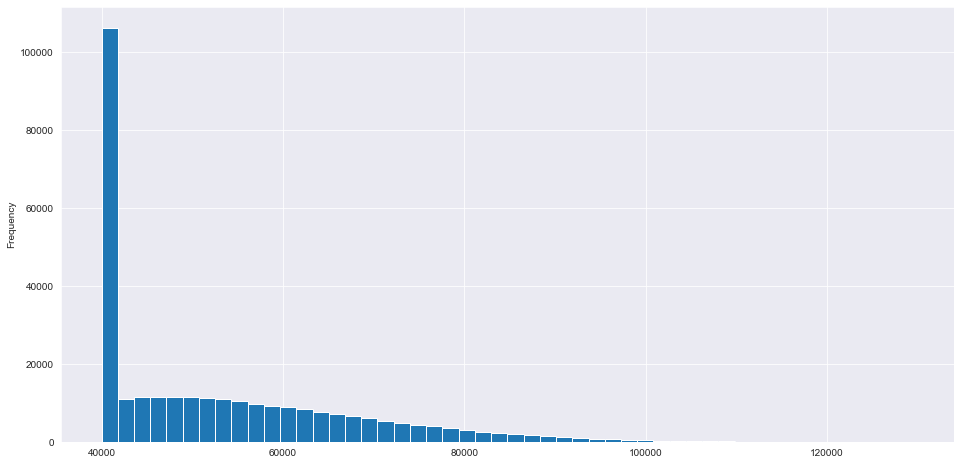

In [13]:
df.salary.plot(kind='hist', bins=50)

<AxesSubplot:xlabel='salary'>

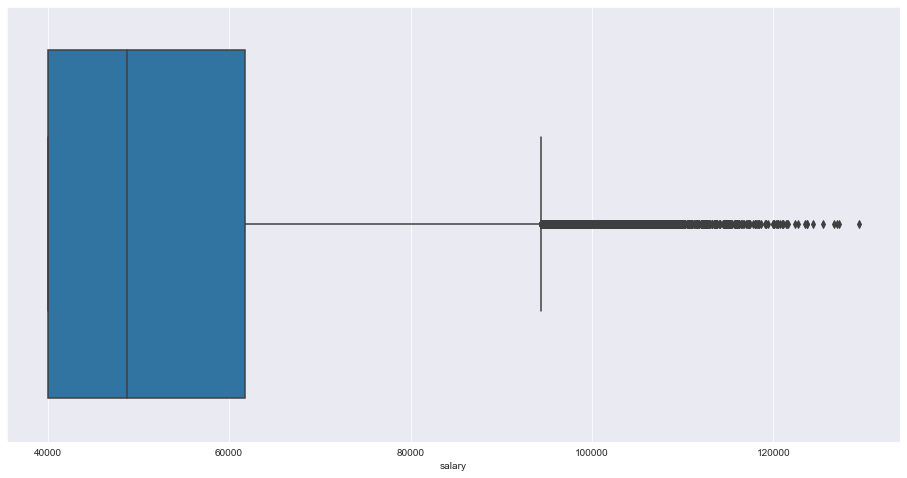

In [14]:
sns.boxplot(x='salary', data=df)

<AxesSubplot:xlabel='salary', ylabel='Density'>

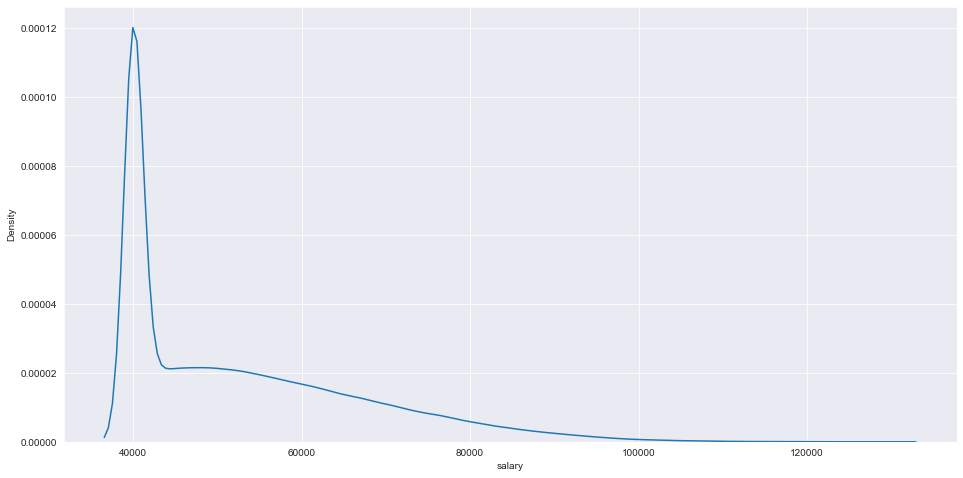

In [15]:
sns.kdeplot(df.salary)

In [16]:
df.title.value_counts()

Engineer              105710
Senior Staff           92844
Staff                  41123
Senior Engineer        30047
Technique Leader       15148
Assistant Engineer     15128
Manager                   24
Name: title, dtype: int64

<AxesSubplot:>

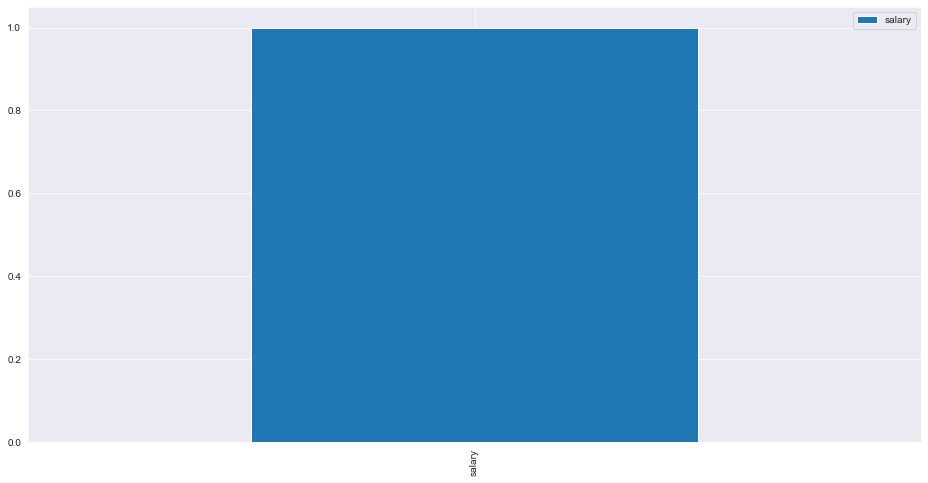

In [17]:
df.corr().plot(kind='bar')

<AxesSubplot:xlabel='title'>

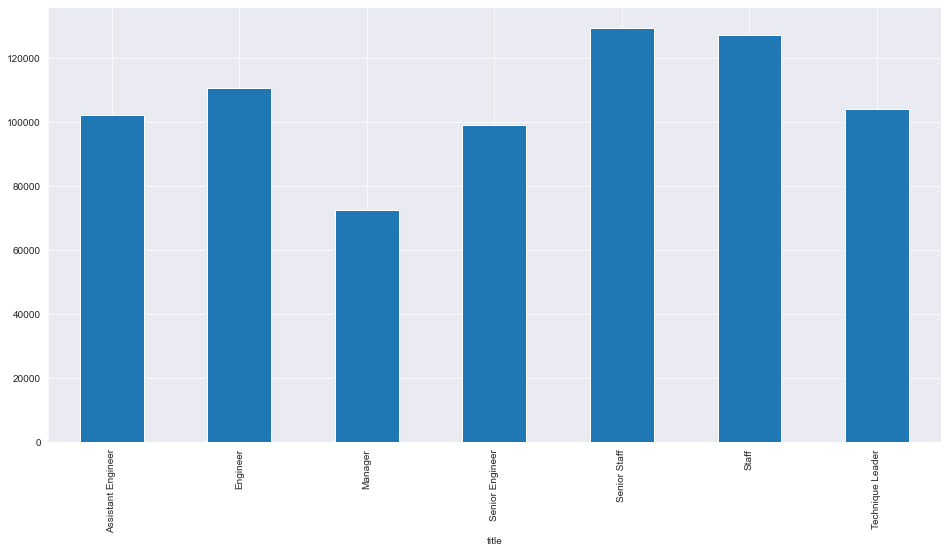

In [18]:
# what title has the highest salary?
df.groupby('title').salary.max().plot(kind='bar')

<AxesSubplot:xlabel='title', ylabel='salary'>

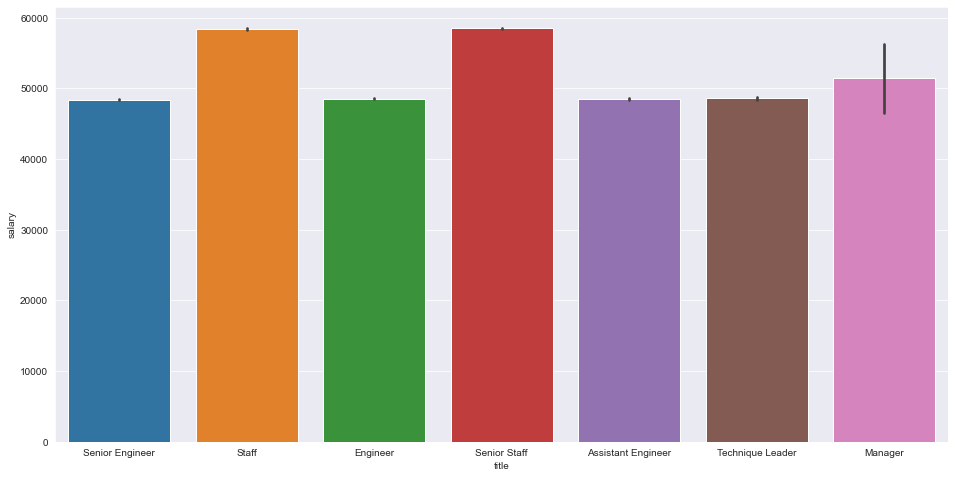

In [19]:
sns.barplot(x='title', y='salary', data=df)

<AxesSubplot:xlabel='title', ylabel='salary'>

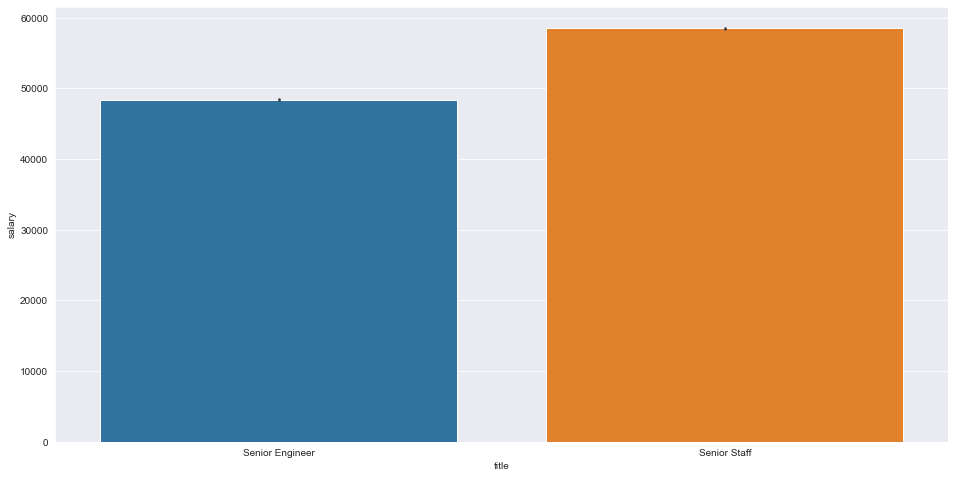

In [20]:
# how many senior engineers or staff are there?
sns.barplot(x='title', y='salary', data=df[df.title.str.contains('Senior')])

In [21]:
df.head()

,title,first_name,last_name,birth_date,gender,salary,from_date
0,Senior Engineer,Georgi,Facello,1953-09-02,M,60117,1986-06-26
1,Staff,Bezalel,Simmel,1964-06-02,F,65828,1996-08-03
2,Senior Engineer,Parto,Bamford,1959-12-03,M,40006,1995-12-03
3,Engineer,Chirstian,Koblick,1954-05-01,M,40054,1986-12-01
4,Senior Staff,Kyoichi,Maliniak,1955-01-21,M,78228,1996-09-12


In [22]:
df.from_date.unique()

array(['1986-06-26T00:00:00.000000000', '1996-08-03T00:00:00.000000000',
       '1995-12-03T00:00:00.000000000', ...,
       '2002-05-28T00:00:00.000000000', '2000-08-04T00:00:00.000000000',
       '2001-05-12T00:00:00.000000000'], dtype='datetime64[ns]')

In [23]:
df.salary.min()

40000

In [24]:
# get the ten employees with the lowest salary
print(df[df.salary == df.salary.min()].head(10))


               title first_name  last_name birth_date gender  salary  \
5    Senior Engineer     Anneke    Preusig 1953-04-20      F   40000   
11          Engineer   Patricio  Bridgland 1960-10-04      M   40000   
12      Senior Staff  Eberhardt     Terkki 1963-06-07      M   40000   
14      Senior Staff   Guoxiang  Nooteboom 1959-08-19      M   40000   
19          Engineer     Mayuko    Warwick 1952-12-24      M   40000   
21          Engineer     Shahaf     Famili 1952-07-08      M   40000   
24  Technique Leader  Prasadram     Heyers 1958-10-31      M   40000   
26          Engineer     Divier    Reistad 1962-07-10      F   40000   
30          Engineer    Karsten     Joslin 1959-01-27      M   40000   
36          Engineer    Pradeep   Makrucki 1963-07-22      M   40000   

    from_date  
5  1990-08-05  
11 1992-12-18  
12 1985-10-20  
14 1992-09-19  
19 1997-12-30  
21 1999-09-03  
24 1987-08-17  
26 1995-04-02  
30 1991-09-01  
36 1990-12-05  


In [25]:
df.groupby('first_name').first_name.count()

first_name
Aamer         228
Aamod         216
Abdelaziz     227
Abdelghani    247
Abdelkader    222
             ... 
Ziyad         229
Zongyan       254
Zorica        225
Zsolt         236
Zvonko        258
Name: first_name, Length: 1275, dtype: int64

In [26]:
df[df.title == 'Senior Engineer'].groupby('title').title.count()

title
Senior Engineer    30047
Name: title, dtype: int64

<AxesSubplot:xlabel='title', ylabel='salary'>

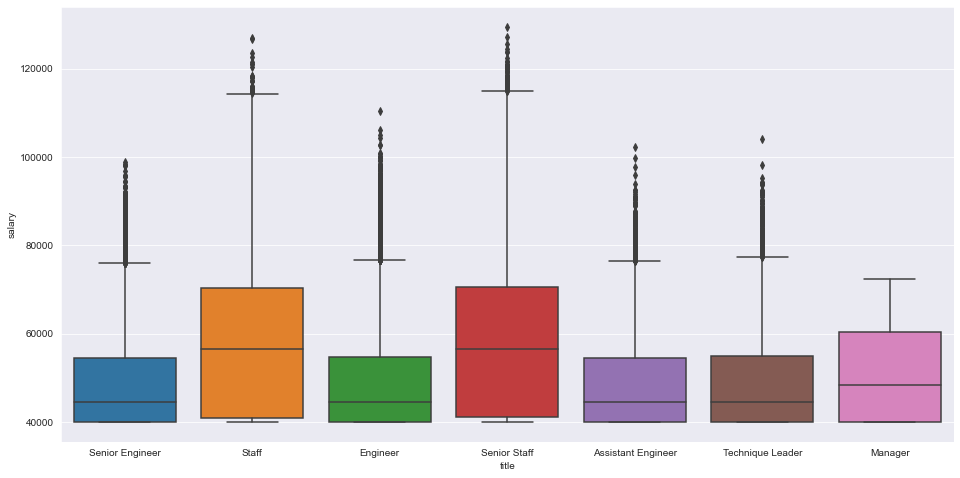

In [27]:
sns.boxplot(x='title', y='salary', data=df)

In [28]:
print(df.head())

             title first_name last_name birth_date gender  salary  from_date
0  Senior Engineer     Georgi   Facello 1953-09-02      M   60117 1986-06-26
1            Staff    Bezalel    Simmel 1964-06-02      F   65828 1996-08-03
2  Senior Engineer      Parto   Bamford 1959-12-03      M   40006 1995-12-03
3         Engineer  Chirstian   Koblick 1954-05-01      M   40054 1986-12-01
4     Senior Staff    Kyoichi  Maliniak 1955-01-21      M   78228 1996-09-12


In [29]:
# how many engineers are there?
df[df.title == 'Engineer'].groupby('title').title.count()

title
Engineer    105710
Name: title, dtype: int64

In [30]:
# what is the average salary of a senior engineer?
df[df.title == 'Senior Engineer'].groupby('title').salary.mean()

title
Senior Engineer    48425.490299
Name: salary, dtype: float64

In [31]:
# what is the average salary of an engineer?
df[df.title == 'Engineer'].groupby('title').salary.mean()

title
Engineer    48547.807738
Name: salary, dtype: float64

In [32]:
# who is the person with the highest salary?
df[df.salary == df.salary.max()].head(1)

,title,first_name,last_name,birth_date,gender,salary,from_date
105024,Senior Staff,Charmane,Griswold,1956-01-14,M,129492,1999-10-12


In [33]:
# who is the person with the lowest salary?
df[df.salary == df.salary.min()].head(1)

,title,first_name,last_name,birth_date,gender,salary,from_date
5,Senior Engineer,Anneke,Preusig,1953-04-20,F,40000,1990-08-05


In [34]:
# what is the average salary of men?
df[df.gender == 'M'].groupby('gender').salary.mean()

gender
M    52982.002945
Name: salary, dtype: float64

In [35]:
# what is the average salary of women?
df[df.gender == 'F'].groupby('gender').salary.mean()

gender
F    52953.836428
Name: salary, dtype: float64

In [36]:
# how many males are senior engineers?
male_senior_engineers = df[(df.gender == 'm'.upper()) & (df.title == 'Senior Engineer')].value_counts()
male_senior_engineers

title            first_name  last_name    birth_date  gender  salary  from_date 
Senior Engineer  Aamer       Armand       1952-08-12  M       40000   1990-09-15    1
                 Premsyl     Murrill      1959-08-05  M       43434   2000-01-09    1
                 Prodip      Baik         1957-06-26  M       59616   2000-01-14    1
                             Angiulli     1960-02-18  M       63512   1985-08-19    1
                 Premsyl     Shimshoni    1955-06-10  M       56423   1986-01-30    1
                                                                                   ..
                 Howell      Birta        1959-09-01  M       46873   1987-05-30    1
                             Buchter      1964-06-04  M       40000   1989-02-09    1
                             Cappelletti  1953-06-27  M       40000   1985-11-05    1
                             Compeau      1952-02-17  M       40000   1993-07-24    1
                 Zvonko      Suomi        1957-07-22  M    

In [37]:
# how many females are senior engineers?
female_senior_engineers = df[(df.gender == 'f'.upper()) & (df.title == 'Senior Engineer')].value_counts()
female_senior_engineers

title            first_name  last_name      birth_date  gender  salary  from_date 
Senior Engineer  Aamer       Beznosov       1962-09-24  F       46010   1988-09-21    1
                 Pranay      Dehkordi       1953-01-05  F       40000   1996-11-17    1
                 Pranav      Sudbeck        1961-12-20  F       71413   1991-06-21    1
                             Taubman        1952-07-22  F       43102   1990-10-05    1
                             Vickson        1959-12-17  F       57111   1991-03-29    1
                                                                                     ..
                 Hironobu    Veeraraghavan  1961-05-10  F       54292   1990-07-18    1
                 Hironoby    Llado          1953-03-31  F       40000   1989-01-03    1
                             Mahnke         1958-09-13  F       43775   1995-10-03    1
                             Melichar       1952-12-31  F       66422   1988-04-20    1
                 Zvonko      Wroclaws

In [38]:
# find how many people with the name Markovitch there are
df[(df.last_name == 'Markovitch') & (df.title == 'Engineer') & (df.gender == 'm'.upper())].value_counts()

title     first_name     last_name   birth_date  gender  salary  from_date 
Engineer  Alenka         Markovitch  1953-03-29  M       55299   1985-12-28    1
          Arne           Markovitch  1953-08-19  M       40000   1999-11-03    1
          Martine        Markovitch  1952-08-06  M       44501   1988-04-20    1
          Mohamadou      Markovitch  1955-03-17  M       61386   1997-04-26    1
          Muzhong        Markovitch  1958-12-23  M       43944   1999-08-19    1
          Otilia         Markovitch  1959-04-07  M       47216   1998-06-03    1
          Panayotis      Markovitch  1955-02-05  M       40000   2000-01-06    1
          Rance          Markovitch  1960-12-22  M       40000   1989-10-18    1
          Rosella        Markovitch  1962-03-28  M       45995   1986-01-05    1
          Rutger         Markovitch  1953-06-25  M       71860   1996-03-11    1
          Sachar         Markovitch  1960-12-18  M       40000   1999-11-03    1
          Sandeepan      Markovit

In [39]:
df.salary.max()

129492

In [40]:
df[df.salary > 120000].value_counts()

title         first_name  last_name     birth_date  gender  salary  from_date 
Senior Staff  Almudena    Dratva        1963-05-08  M       120487  1998-04-06    1
              Bedrich     Luft          1952-09-01  F       120032  1996-01-20    1
Staff         Nahid       Varker        1957-12-18  M       127041  1999-06-14    1
              Martine     Heydon        1957-05-30  F       123477  1995-08-19    1
              Manibrata   Lieberherr    1952-07-12  M       121070  1992-05-21    1
              Khun        Ponthieu      1960-06-22  F       121468  1998-02-28    1
              Jenwei      Spelt         1962-05-07  M       120986  1995-02-24    1
              Chinhyun    Klyachko      1953-04-30  M       122726  1999-02-10    1
              Adil        Brickell      1952-03-18  M       120446  1996-12-07    1
Senior Staff  Tsutomu     Alameldin     1955-08-02  M       123668  1993-02-15    1
              Toshimo     Reghbati      1953-01-26  M       124357  1995-12-11   

In [41]:
df[(df.gender == 'f'.upper()) & (df.salary > 120000)]

,title,first_name,last_name,birth_date,gender,salary,from_date
38570,Staff,Khun,Ponthieu,1960-06-22,F,121468,1998-02-28
88168,Senior Staff,Bedrich,Luft,1952-09-01,F,120032,1996-01-20
167029,Senior Staff,Filipe,Condotta,1961-03-21,F,122423,1999-07-14
274480,Staff,Martine,Heydon,1957-05-30,F,123477,1995-08-19
